In [5]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [8]:
df = pd.read_csv('houses.csv')
len(df)

452

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 24 columns):
address         85 non-null object
area            452 non-null int64
balcony         0 non-null float64
cellar          452 non-null bool
city            452 non-null object
contact_name    391 non-null object
district        452 non-null object
extra_costs     0 non-null float64
garden          0 non-null float64
immo_id         452 non-null int64
kitchen         0 non-null float64
lat             81 non-null float64
lng             81 non-null float64
media_count     452 non-null int64
private         452 non-null bool
rent            452 non-null int64
rooms           452 non-null float64
sqm             452 non-null float64
time_dest       0 non-null float64
time_dest2      0 non-null float64
time_dest3      0 non-null float64
title           452 non-null object
url             452 non-null object
zip_code        452 non-null int64
dtypes: bool(2), float64(11), int64(5), object

In [10]:
df.head()

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,private,rent,rooms,sqm,time_dest,time_dest2,time_dest3,title,url,zip_code
0,NaN,100,NaN,False,Ostprignitz-Ruppin (Kreis),Dipl.-Ing.Ralf Erich Hans Steinmann,Kyritz,NaN,NaN,94113154,...,False,39000,5.0,100.0,NaN,NaN,NaN,Kyritz-Citylage! Auch in zwei Wohneinheiten te...,https://www.immobilienscout24.de/expose/94113154,16866
1,NaN,1060,NaN,False,Dahme-Spreewald (Kreis),Bernhard Büttner,Golßen,NaN,NaN,89713144,...,False,50000,4.0,187.0,NaN,NaN,NaN,***Handwerkerobjekt in Golßen im idyllischen G...,https://www.immobilienscout24.de/expose/89713144,15938
2,"Am Weinberg II, Hausnummer 501",306,NaN,False,Dahme-Spreewald (Kreis),Plettner & Brecht Immobilien GmbH,Schwielochsee,NaN,NaN,106219505,...,False,14900,2.0,40.0,NaN,NaN,NaN,Bezugsfreies Wochenendbungalow nahe dem Kleine...,https://www.immobilienscout24.de/expose/106219505,15913
3,NaN,627,NaN,False,Potsdam-Mittelmark (Kreis),Sibylle Heide,Havelsee,NaN,NaN,106213085,...,False,16000,1.0,25.0,NaN,NaN,NaN,Den Sommer genießen,https://www.immobilienscout24.de/expose/106213085,14798
4,NaN,1302,NaN,False,Dahme-Spreewald (Kreis),Bernhard Büttner,Münchehofe,NaN,NaN,102951766,...,False,49000,2.0,40.0,NaN,NaN,NaN,***Erholungsgrundstück mit kleiner Doppelhaush...,https://www.immobilienscout24.de/expose/102951766,15748


## Data Cleaning

In [11]:
df.immo_id = df.immo_id.astype(str)
df.zip_code = df.zip_code.astype(str)
df2=df.drop(columns=["time_dest", "time_dest2", "time_dest3"])
df2.describe()

,area,balcony,extra_costs,garden,kitchen,lat,lng,media_count,rent,rooms,sqm
count,452.000000,0.0,0.0,0.0,0.0,81.000000,81.000000,452.000000,452.000000,452.000000,452.000000
mean,1670.946903,NaN,NaN,NaN,NaN,52.545090,13.556852,13.889381,59969.533186,4.775442,127.200509
std,2902.259936,NaN,NaN,NaN,NaN,0.640315,0.808090,13.360138,26265.177687,4.038605,133.685552
min,0.000000,NaN,NaN,NaN,NaN,51.388860,11.586090,0.000000,1.000000,1.000000,0.000000
25%,433.750000,NaN,NaN,NaN,NaN,52.015330,13.161210,6.000000,37375.000000,3.000000,70.000000
50%,816.500000,NaN,NaN,NaN,NaN,52.651200,13.692740,11.000000,60000.000000,4.000000,105.000000
75%,1659.000000,NaN,NaN,NaN,NaN,53.150370,14.150960,17.000000,82000.000000,5.000000,143.250000
max,35393.000000,NaN,NaN,NaN,NaN,53.537940,14.714360,137.000000,100000.000000,40.000000,1550.000000


## Interesting statistics
### Providers with most apartment offers

In [12]:
df2.groupby("contact_name").size().sort_values(ascending=False)

contact_name
Sebastian Stelzig                                      15
Linda Buder                                            11
Anja Emmrich                                           11
Ina Ferchof                                            11
Kathleen Golembieski                                   10
Stefan Ganter                                           9
Maik Neumann                                            7
Anne Koplin                                             7
Silke Boldt                                             7
Maik Mettke                                             7
Haldor Kahmann                                          6
Johanna Pabst                                           6
Alexander Rainer Kremser                                5
Christian Moll                                          5
Rebecca Steinhardt                                      5
Jens Madsen                                             5
Marco Klewe                                             5
U

### Districts with most apartment offers

In [13]:
df2.groupby("district").size().sort_values(ascending=False)

district
Forst (Lausitz)            15
Schenkendöbern             12
Spremberg                  11
Karstädt                   10
Doberlug-Kirchhain          9
Belzig                      7
Elsterwerda                 7
Mühlberg/Elbe               7
Lauchhammer                 7
Oderberg                    6
Lenzen (Elbe)               6
Angermünde                  6
Nordwestuckermark           6
Uebigau-Wahrenbrück         5
Neuhausen/Spree             5
Oranienburg                 5
Treuenbrietzen              5
Pritzwalk                   5
Sonnewalde                  5
Großräschen                 5
Guben                       5
Sallgast                    5
Letschin                    5
Uckerland                   4
Dahme/Mark                  4
Welzow                      4
Groß Pankow (Prignitz)      4
Wittstock/Dosse             4
Plattenburg                 4
Herzberg/Elster             4
                           ..
Lanz                        1
Lebusa                      1
L

In [24]:
df3=df2[(df2.sqm<600) & (df2.area < 15000)]
len(df3)

444

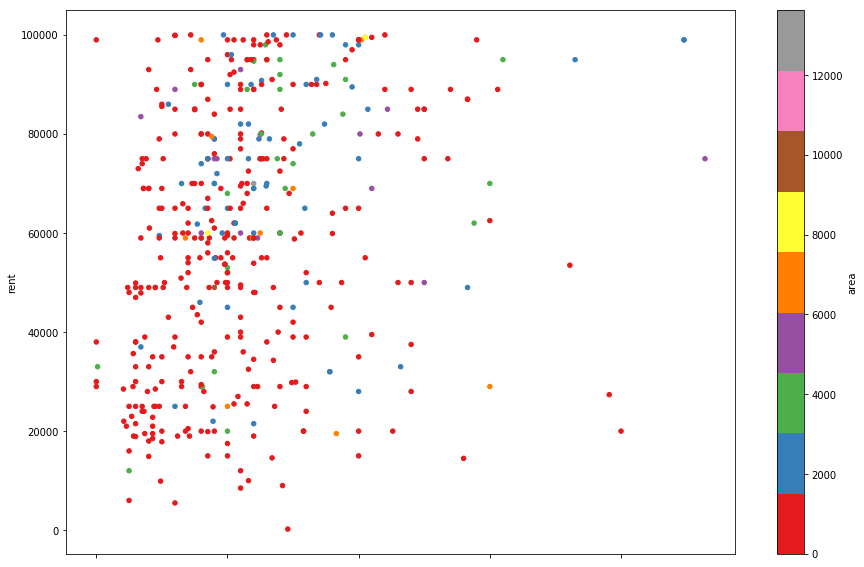

In [27]:
df3.plot(x="sqm", y="rent", c="area", kind="scatter",colormap=cm.Set1, figsize=(15,10))

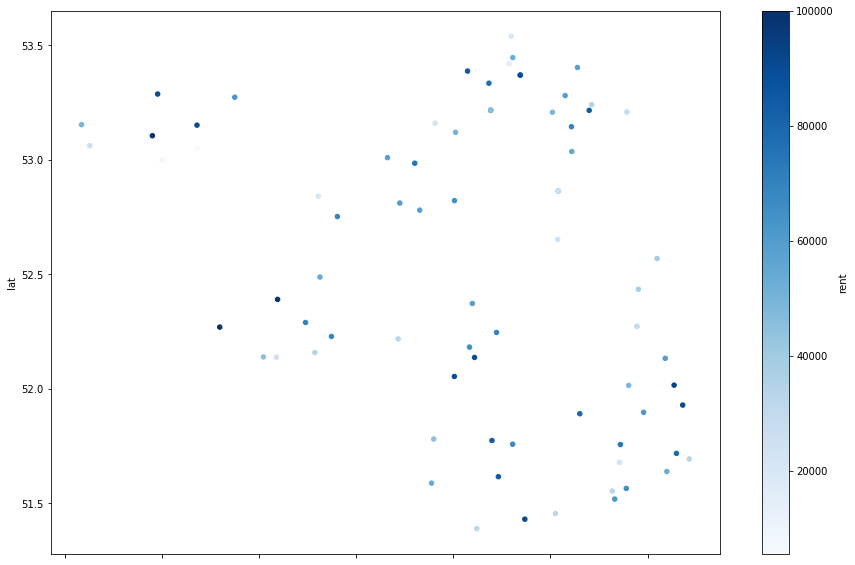

In [28]:
df3.plot(x="lng", y="lat", c="rent", kind="scatter", figsize=(15,10), colormap=cm.Blues)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1252a9ef0>,
      dtype=object)

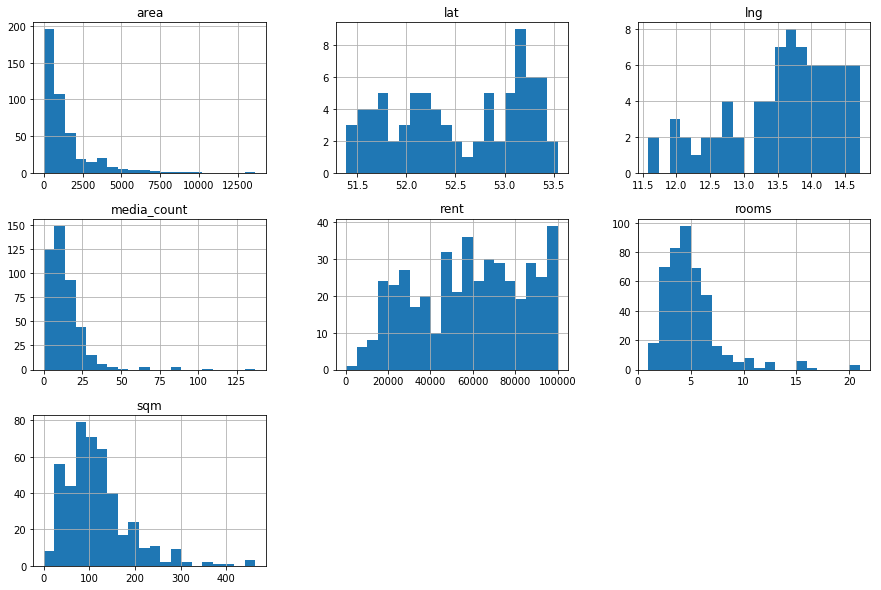

In [29]:
df3.hist(bins=20,figsize=(15,10), column=["area","lat","lng","media_count","rent","rooms","sqm"])

In [30]:
corr=df3.corr()

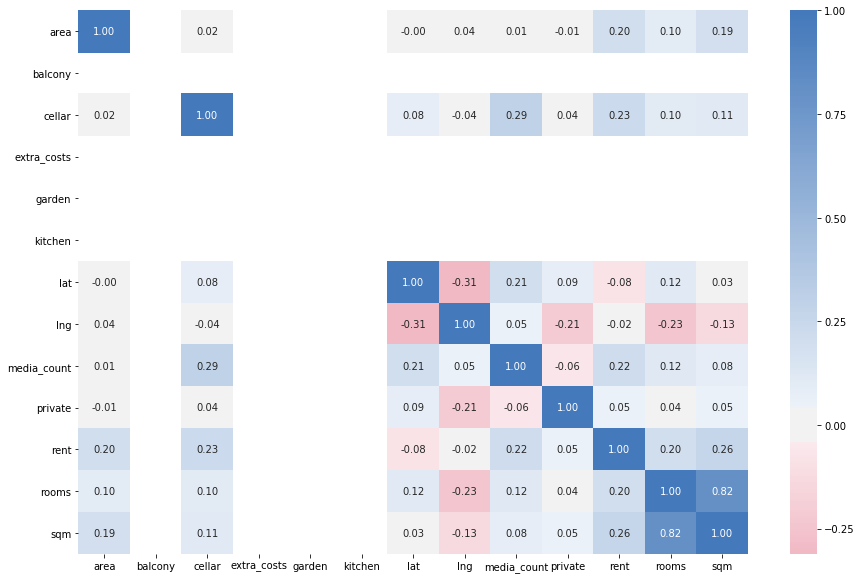

In [31]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, center=0.0, 
            cmap=sns.diverging_palette(5, 250, as_cmap=True), annot=True, fmt=".2f", ax=ax)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


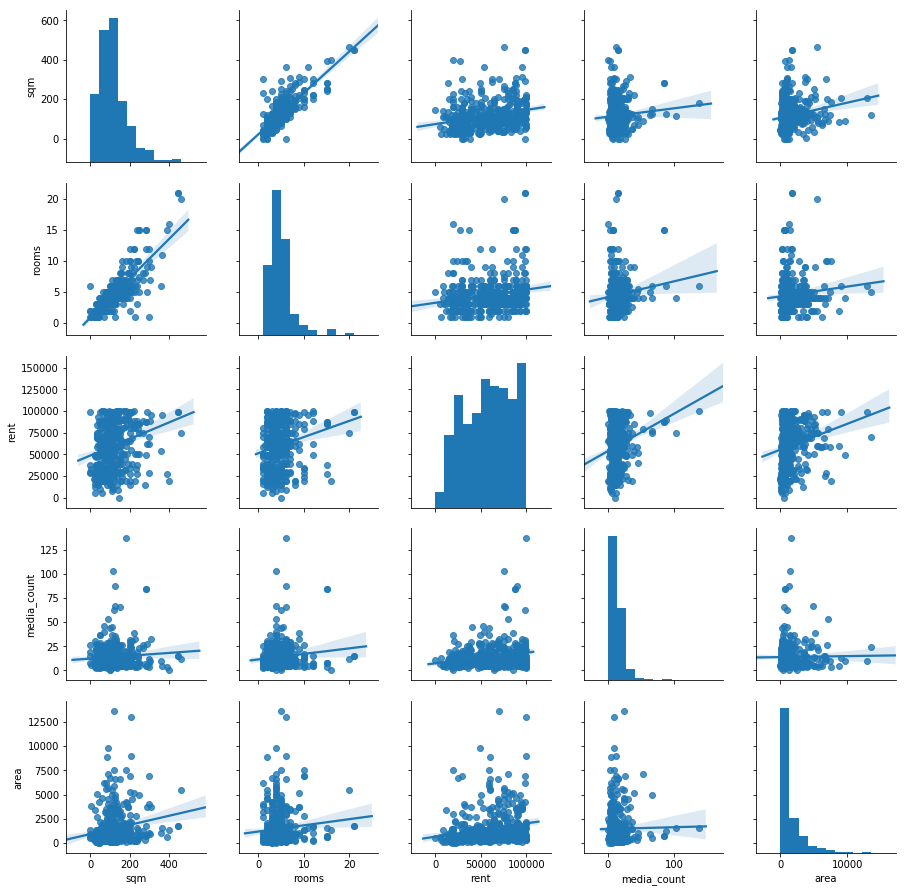

In [38]:
sns.pairplot(df3, vars=["sqm","rooms","rent","media_count", "area"], kind="reg")

In [39]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

In [41]:
# One-hot encoding of zip_codes
hot_zip = pd.get_dummies(df3.zip_code)
#df3.balcony = df3.balcony.astype(int)
#df3.garden = df3.garden.astype(int)
#df3.kitchen = df3.kitchen.astype(int)
#df3.private = df3.private.astype(int)
df3.cellar = df3.cellar.astype(int)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [42]:
X = pd.concat((df3[["sqm","rooms","area","cellar"]], hot_zip), axis=1)
y = df3[["rent"]]

In [43]:
X.head()

,sqm,rooms,area,cellar,14542,14547,14550,14641,14669,14712,...,4910,4916,4924,4928,4931,4932,4934,4936,4938,7554
0,100.0,5.0,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,187.0,4.0,1060,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,2.0,306,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25.0,1.0,627,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.0,2.0,1302,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# a simple linear model doesn't perform too well
simple = linear_model.LinearRegression()
simple.fit(X,y)
y_pred = simple.predict(X)
r2_score(y, y_pred)

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


0.4460684685260624

In [45]:
# Robustly fit linear model with RANSAC (RANdom SAmple Consensus) algorithm 
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [46]:
regressor.fit(X,y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [47]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

32.4% der Wohnungen als Ausreißer identifiziert


In [48]:
y_pred = regressor.predict(X)
df3["rent_predicted"] = y_pred

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


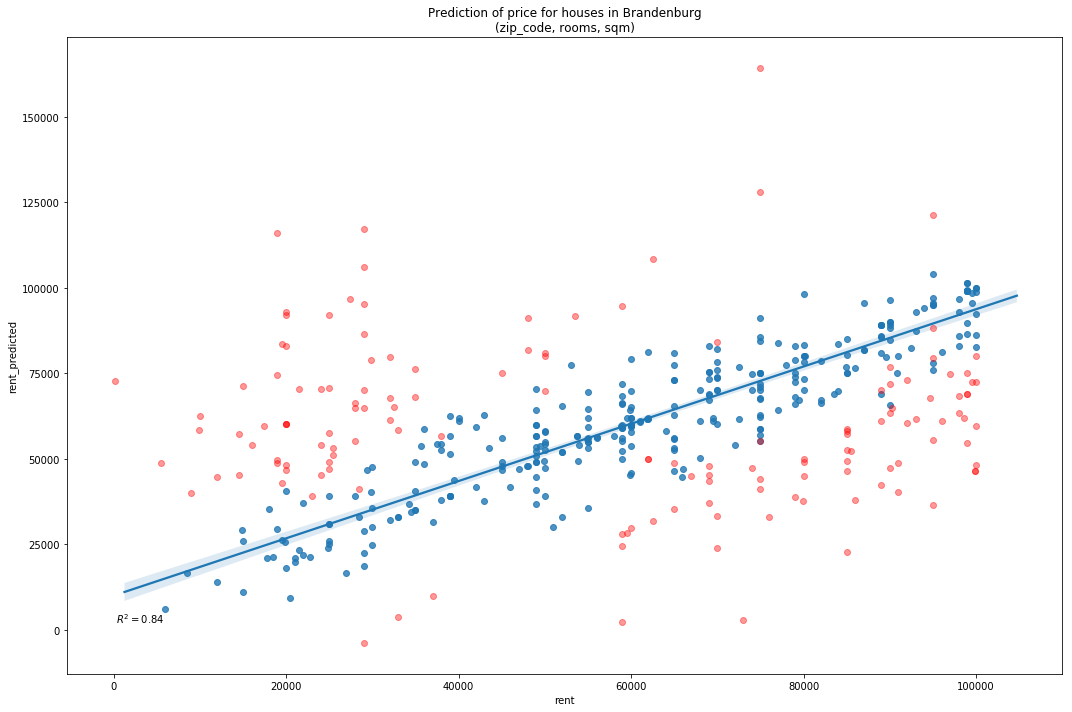

In [51]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.regplot(df3['rent'][inlier_mask],
            df3['rent_predicted'][inlier_mask])
plt.scatter(df3['rent'][outlier_mask],
            df3['rent_predicted'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title('Prediction of price for houses in Brandenburg\n(zip_code, rooms, sqm)')
plt.text(250, 2000, r'$R^2=%.2f$' % r2_ransac)
plt.tight_layout()
# plt.savefig('LinReg-rent-apartment.png', dpi=150)

In [52]:
df3["rent_error"] = df3["rent"] - df3["rent_predicted"]

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
top = df3.sort_values("rent_error")

In [54]:
top

,address,area,balcony,cellar,city,contact_name,district,extra_costs,garden,immo_id,...,media_count,private,rent,rooms,sqm,title,url,zip_code,rent_predicted,rent_error
432,NaN,1487,NaN,0,Elbe-Elster (Kreis),Jens Madsen,Herzberg/Elster,NaN,NaN,88000685,...,3,False,19000,3.0,62.0,Bauernhaus für Bastler,https://www.immobilienscout24.de/expose/88000685,4916,115935.942336,-96935.942336
45,NaN,795,NaN,1,Elbe-Elster (Kreis),Linda Buder,Herzberg/Elster,NaN,NaN,104049545,...,23,False,75000,7.5,250.0,Groß und gemütlich,https://www.immobilienscout24.de/expose/104049545,4916,164210.246541,-89210.246541
84,NaN,363,NaN,0,Elbe-Elster (Kreis),Linda Buder,Herzberg/Elster,NaN,NaN,104049933,...,10,False,29000,3.0,80.0,Jetzt schnell sein!,https://www.immobilienscout24.de/expose/104049933,4916,117362.983034,-88362.983034
249,NaN,6900,NaN,0,Uckermark (Kreis),Dorit Wegner,Nordwestuckermark,NaN,NaN,105468259,...,12,False,29000,10.0,300.0,RESERVIERT!! - EIN GROSSES GRUNDSTÜCK ZUM KLEI...,https://www.immobilienscout24.de/expose/105468259,17291,106225.125006,-77225.125006
229,NaN,213,NaN,1,Oberspreewald-Lausitz (Kreis),Sarah-Sophie Derling,Altdöbern,NaN,NaN,105723058,...,3,False,19998,5.0,226.0,Einfamilienhaus_ ca. 226 m²_sanierungsbedürftig,https://www.immobilienscout24.de/expose/105723058,3229,92856.543438,-72858.543438
423,NaN,550,NaN,0,Havelland (Kreis),Dirk Braunschweig,Wustermark,NaN,NaN,92816206,...,11,False,220,5.0,146.0,Nicht länger warten ... jetzt BAUEN! KFW 55 im...,https://www.immobilienscout24.de/expose/92816206,14641,72681.742078,-72461.742078
254,NaN,240,NaN,1,Barnim (Kreis),Uwe Eschert,Oderberg,NaN,NaN,105320555,...,15,False,20000,6.0,200.0,Wohn- und Geschäftshaus in Oderberg (Leerstand),https://www.immobilienscout24.de/expose/105320555,16248,92024.998165,-72024.998165
65,NaN,663,NaN,0,Elbe-Elster (Kreis),Kathleen Golembieski,Elsterwerda,NaN,NaN,94589870,...,3,False,27360,15.0,391.0,Zwangsversteigerung am 07.08.2018,https://www.immobilienscout24.de/expose/94589870,4910,96606.478731,-69246.478731
195,NaN,600,NaN,0,Brandenburg an der Havel,Marina Haseloff,Neustadt,NaN,NaN,106169318,...,3,False,25000,2.0,48.0,Ferienbungalow auf sicherem Pachtland unweit B...,https://www.immobilienscout24.de/expose/106169318,14776,91956.592176,-66956.592176
443,NaN,300,NaN,1,Oberspreewald-Lausitz (Kreis),Ronald Kulnick,Großräschen,NaN,NaN,71380534,...,9,False,29000,3.0,65.0,Ein Anfang ist gemacht,https://www.immobilienscout24.de/expose/71380534,1983,95307.304462,-66307.304462


In [55]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25)

In [57]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2, scoring="r2")
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/andi/.local/share/virtualenvs/ImmoSpider-M0SYrQN4/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:  33%|███▎      | 40/120 [00:21<00:51,  1.55pipeline/s]

Generation 1 - Current best internal CV score: 0.14364768400252653


Optimization Progress:  50%|█████     | 60/120 [00:35<00:43,  1.37pipeline/s]

Generation 2 - Current best internal CV score: 0.14364768400252653


Optimization Progress:  67%|██████▋   | 80/120 [00:53<00:25,  1.56pipeline/s]

Generation 3 - Current best internal CV score: 0.14383612624991568


Optimization Progress:  83%|████████▎ | 100/120 [01:14<00:15,  1.30pipeline/s]

Generation 4 - Current best internal CV score: 0.14860805291607176


Generation 5 - Current best internal CV score: 0.14860805291607176

Best pipeline: RandomForestRegressor(OneHotEncoder(input_matrix, minimum_fraction=0.2, sparse=False), bootstrap=False, max_features=0.35000000000000003, min_samples_leaf=15, min_samples_split=6, n_estimators=100)
0.12595318630220242


In [58]:
y_pred = tpot.predict(X)

In [59]:
y_pred_test = tpot.predict(X_test)
r2_score(y_test, y_pred_test)

0.12595318630220242